In [ ]:
#Ejercicio 1
# : analiza cada caso y responde según corresponda.
#1. Un modelo clasificó 100 correos, detectó 60 como SPAM. De esos, 50 eran realmente SPAM, 
# y 10 eran correos normales. Además, no detectó 5 SPAM y clasificó correctamente 25 correos normales. 
# Construye la matriz de confusión.

Matriz de confusión:
 [[25 10]
 [ 5 50]]


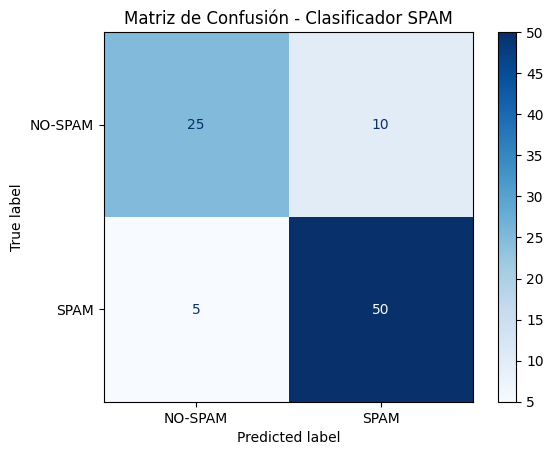

In [1]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Paso 1: Simulamos los datos
# y_true = verdaderas etiquetas (1=SPAM, 0=NO-SPAM)
# y_pred = etiquetas predichas por el modelo

# 50 TP → SPAM correcto
# 10 FP → normales clasificados como SPAM
# 5 FN → SPAM que no fueron detectados
# 25 TN → normales correctamente clasificados

y_true = [1]*50 + [0]*10 + [1]*5 + [0]*25     # 100 valores
y_pred = [1]*50 + [1]*10 + [0]*5 + [0]*25     # 100 valores

# Paso 2: Crear la matriz de confusión
cm = confusion_matrix(y_true, y_pred)
print("Matriz de confusión:\n", cm)

# Paso 3: Mostrar gráficamente
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["NO-SPAM", "SPAM"])
disp.plot(cmap="Blues")
plt.title("Matriz de Confusión - Clasificador SPAM")
plt.show()


In [2]:
#Librerías
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import joblib

In [52]:
# Paso 1: Cargar el archivo CSV
df = pd.read_csv("clientes_preprocesamiento.csv")
df

,ID,Edad,Genero,Ciudad,Ingresos_Mensuales,Frecuencia_Compra,Ultima_Compra_dias,Compra
0,1,NaN,Masculino,Cuenca,2946.0,3,103,0
1,2,NaN,NaN,NaN,1340.0,8,72,0
2,3,NaN,Femenino,Ambato,1052.0,8,173,1
3,4,NaN,NaN,Quito,2321.0,2,4,0
4,5,35.0,NaN,Quito,1522.0,2,166,1
...,...,...,...,...,...,...,...,...
2995,2996,42.0,NaN,Guayaquil,1898.0,2,168,1
2996,2997,NaN,NaN,Ambato,1570.0,7,21,1
2997,2998,NaN,NaN,Quito,3812.0,9,146,0
2998,2999,NaN,Masculino,Cuenca,3083.0,15,112,1


In [53]:
# Paso 2
# Ver columnas y tipos de datos
print(df.info())

# Ver primeros registros
print(df.head())

# Estadísticas generales de columnas numéricas
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  3000 non-null   int64  
 1   Edad                1001 non-null   float64
 2   Genero              1981 non-null   object 
 3   Ciudad              2368 non-null   object 
 4   Ingresos_Mensuales  2968 non-null   float64
 5   Frecuencia_Compra   3000 non-null   int64  
 6   Ultima_Compra_dias  3000 non-null   int64  
 7   Compra              3000 non-null   int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 187.6+ KB
None
   ID  Edad     Genero  Ciudad  Ingresos_Mensuales  Frecuencia_Compra  \
0   1   NaN  Masculino  Cuenca              2946.0                  3   
1   2   NaN        NaN     NaN              1340.0                  8   
2   3   NaN   Femenino  Ambato              1052.0                  8   
3   4   NaN        NaN   Quito             

In [54]:
#Paso 3
df.columns
df.isnull().sum()


ID                       0
Edad                  1999
Genero                1019
Ciudad                 632
Ingresos_Mensuales      32
Frecuencia_Compra        0
Ultima_Compra_dias       0
Compra                   0
dtype: int64

In [55]:
#Paso 4
# Reemplazar valores nulos en todo el DataFrame
df.fillna("sin info", inplace=True)
df

C:\Users\User\AppData\Local\Temp\ipykernel_17928\1911561339.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'sin info' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna("sin info", inplace=True)


,ID,Edad,Genero,Ciudad,Ingresos_Mensuales,Frecuencia_Compra,Ultima_Compra_dias,Compra
0,1,sin info,Masculino,Cuenca,2946.0,3,103,0
1,2,sin info,sin info,sin info,1340.0,8,72,0
2,3,sin info,Femenino,Ambato,1052.0,8,173,1
3,4,sin info,sin info,Quito,2321.0,2,4,0
4,5,35.0,sin info,Quito,1522.0,2,166,1
...,...,...,...,...,...,...,...,...
2995,2996,42.0,sin info,Guayaquil,1898.0,2,168,1
2996,2997,sin info,sin info,Ambato,1570.0,7,21,1
2997,2998,sin info,sin info,Quito,3812.0,9,146,0
2998,2999,sin info,Masculino,Cuenca,3083.0,15,112,1


In [56]:
#Paso 5
df['Ciudad'].value_counts()


Ciudad
Ambato       633
sin info     632
Cuenca       587
Quito        586
Guayaquil    562
Name: count, dtype: int64

In [57]:
df['Genero'].value_counts()

Genero
sin info     1019
Femenino      998
Masculino     983
Name: count, dtype: int64

In [58]:
df['Ciudad_Codificada'] = pd.factorize(df['Ciudad'])[0]
print(df)
df['Genero_Codificado'] = pd.factorize(df['Genero'])[0]
print(df)

        ID      Edad     Genero     Ciudad Ingresos_Mensuales  \
0        1  sin info  Masculino     Cuenca             2946.0   
1        2  sin info   sin info   sin info             1340.0   
2        3  sin info   Femenino     Ambato             1052.0   
3        4  sin info   sin info      Quito             2321.0   
4        5      35.0   sin info      Quito             1522.0   
...    ...       ...        ...        ...                ...   
2995  2996      42.0   sin info  Guayaquil             1898.0   
2996  2997  sin info   sin info     Ambato             1570.0   
2997  2998  sin info   sin info      Quito             3812.0   
2998  2999  sin info  Masculino     Cuenca             3083.0   
2999  3000      64.0  Masculino     Ambato             1335.0   

      Frecuencia_Compra  Ultima_Compra_dias  Compra  Ciudad_Codificada  
0                     3                 103       0                  0  
1                     8                  72       0                  1  


In [59]:
# Paso 6
print(df["Compra"].value_counts())

Compra
0    1892
1    1108
Name: count, dtype: int64


In [65]:
# Paso 7
# Crear función para categorizar ingresos
def categorizar_ingreso(valor):
    if valor < 1500:
        return "Bajo"
    elif valor < 3000:
        return "Medio"
    else:
        return "Alto"

# Aplicar la función a la columna Y
df['Ingresos_Categoricos'] = df['Ingresos_Mensuales'].apply(categorizar_ingreso)

# Convertir categorías en números
encoder = LabelEncoder()
df['Ingresos_Categoricos'] = encoder.fit_transform(df['Ingresos_Categoricos'])

# Actualizar Y con la nueva columna categórica
Y = df['Ingresos_Categoricos']

In [66]:
# Paso 8
# Dividir datos en entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [ ]:
# Paso 9
# Inicializar modelo de clasificación
modelo = RandomForestClassifier(n_estimators=100, random_state=42)
modelo.fit(X_train, Y_train)

# Predicción
predicciones = modelo.predict(X_test)
print(predicciones)

[0 0 0 2 0 2 2 2 0 0 1 2 2 0 0 0 1 2 2 2 1 2 0 2 2 1 1 0 2 2 0 2 1 0 2 2 0
 0 2 0 1 0 0 2 0 0 2 2 0 0 2 2 0 0 2 0 1 2 0 1 0 1 2 0 2 0 2 0 0 0 1 2 1 0
 0 1 1 0 0 1 2 2 1 2 0 0 0 2 1 0 1 0 2 0 0 0 0 2 2 0 0 0 0 0 0 0 1 2 2 1 0
 2 0 1 2 0 2 0 0 2 0 0 2 0 1 0 0 0 0 0 0 0 2 0 2 2 2 0 2 2 0 2 0 1 0 2 0 0
 2 2 2 0 0 0 0 0 1 2 2 0 0 1 1 0 0 1 2 2 2 1 0 2 2 0 1 1 0 1 0 0 1 1 2 2 0
 0 2 0 0 0 0 2 2 1 1 2 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 2 0 0 0 0 0 1 2 0 2
 0 1 1 2 0 1 0 0 0 0 0 2 1 0 1 2 0 2 0 0 0 2 0 0 0 1 0 1 0 2 2 0 2 2 2 0 0
 1 1 0 0 0 0 2 2 1 0 2 0 0 0 0 2 2 0 0 0 2 2 1 2 0 2 2 2 2 2 0 1 1 0 0 0 2
 2 0 0 1 2 2 0 2 2 0 0 0 1 2 2 2 0 2 2 2 0 1 0 0 0 2 0 1 0 0 0 2 1 0 0 1 0
 1 0 2 0 0 0 2 0 0 0 1 0 2 1 1 0 0 0 0 0 2 0 0 2 0 0 0 0 2 0 0 0 0 0 2 2 2
 2 0 1 0 2 2 0 0 2 0 1 0 1 2 0 2 1 0 0 0 2 1 0 0 0 0 0 0 2 0 1 1 0 0 0 0 1
 2 2 0 0 1 0 0 0 0 2 0 2 0 2 0 1 0 0 1 2 0 0 0 0 2 0 0 0 1 1 1 2 2 0 0 2 0
 2 2 2 0 0 2 0 2 0 0 1 0 0 1 2 0 0 0 1 2 1 1 1 0 2 2 1 0 0 2 1 2 0 0 1 0 0
 1 0 0 0 2 2 1 0 2 0 0 0 

Matriz de Confusión:
 [[134  48  81]
 [ 76  24  35]
 [ 98  34  70]]


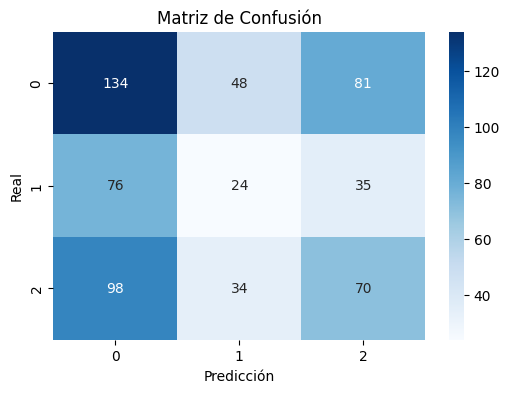

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.44      0.51      0.47       263
           1       0.23      0.18      0.20       135
           2       0.38      0.35      0.36       202

    accuracy                           0.38       600
   macro avg       0.35      0.34      0.34       600
weighted avg       0.37      0.38      0.37       600



In [71]:
# Paso 10
# Predicciones
Y_pred = modelo.predict(X_test)

# Matriz de confusión
matriz_confusion = confusion_matrix(Y_test, Y_pred)
print("Matriz de Confusión:\n", matriz_confusion)

# Visualizar matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(matriz_confusion, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()

# Reporte de métricas
print("Reporte de Clasificación:\n", classification_report(Y_test, Y_pred))

In [75]:
joblib.dump(modelo, 'modelo_clasificacion.joblib')
modelo_cargado = joblib.load('modelo_clasificacion.joblib')
modelo_cargado

RandomForestClassifier(random_state=42)